# Modelagem e Identificação de Sistemas 

[Slides da aula](https://marofe.github.io/controle-digital/2024/aula5.html)

### Questão 1 

Nessa atividade o objetivo é verificar o mapeamento do plano-s para o plano-z. Para isso, considere o plano-s dado por

$$
s = \sigma + j \omega_{n}
$$

Assim, o plano-z é dado por

$$
z = e^{sT}
$$

em que $T > 0$ é o tempo de amostragem. Seguindo a mesma lógica construa o gráfico de pelo menos três retas verticais no SPE do plano-s no plano-z com $T = 1$. 

Observando os gráficos, o que pode-se concluir sobre o comportamento dos polos de frequência maior que $\frac{\pi}{T}$?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control

/tmp/ipykernel_84606/3502517725.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


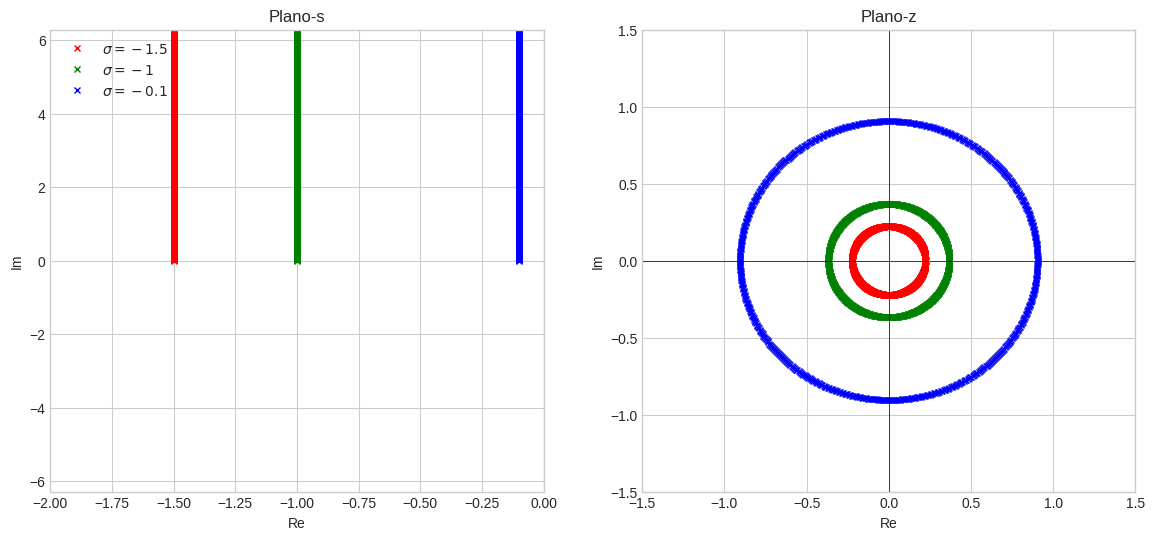

In [2]:
plt.style.use('seaborn-whitegrid')

# Sampling time
T = 1

# Sigma values
sigmas = [-1.5, -1.0, -0.1]
colors = ['red', 'green', 'blue']
labels = [r'$\sigma = -1.5$', r'$\sigma = -1$', r'$\sigma = -0.1$']

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for idx, sigma in enumerate(sigmas):
    # Frequency values
    wn = np.arange(0, 2*np.pi, 0.01)
    
    # Calculating s and z values
    s = sigma + 1j * wn
    z = np.exp(s * T)
    
    axs[0].plot(np.real(s), np.imag(s), marker='x', linestyle='None',
                color=colors[idx], markersize=4, label=labels[idx])
    
    axs[1].plot(np.real(z), np.imag(z), marker='x', linestyle='None',
                color=colors[idx], markersize=4)

axs[0].set_title('Plano-s')
axs[0].set_xlabel('Re')
axs[0].set_ylabel('Im')
axs[0].set_xlim([-2, 0])
axs[0].set_ylim([-2*np.pi, 2*np.pi])
axs[0].legend()
axs[0].grid(True)

axs[1].set_title('Plano-z')
axs[1].set_xlabel('Re')
axs[1].set_ylabel('Im')
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([-1.5, 1.5])
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].axvline(0, color='black', linewidth=0.5)
axs[1].grid(True)

### Questão 2 

Repita a atividade anterior, porem, ao invés de $z = e^{sT}$, utilize os mapeamentos dos métodos de Euler-Backward ($s = \frac{z − 1}{zT}$) e Tustin ($s = \frac{2}{T}\frac{z - 1}{z + 1}$). 

Quais as principais diferenças que podem ser observadas do mapeamento de EulerBackward e Tustin em relação ao mapeamento $z = e^{sT}$?

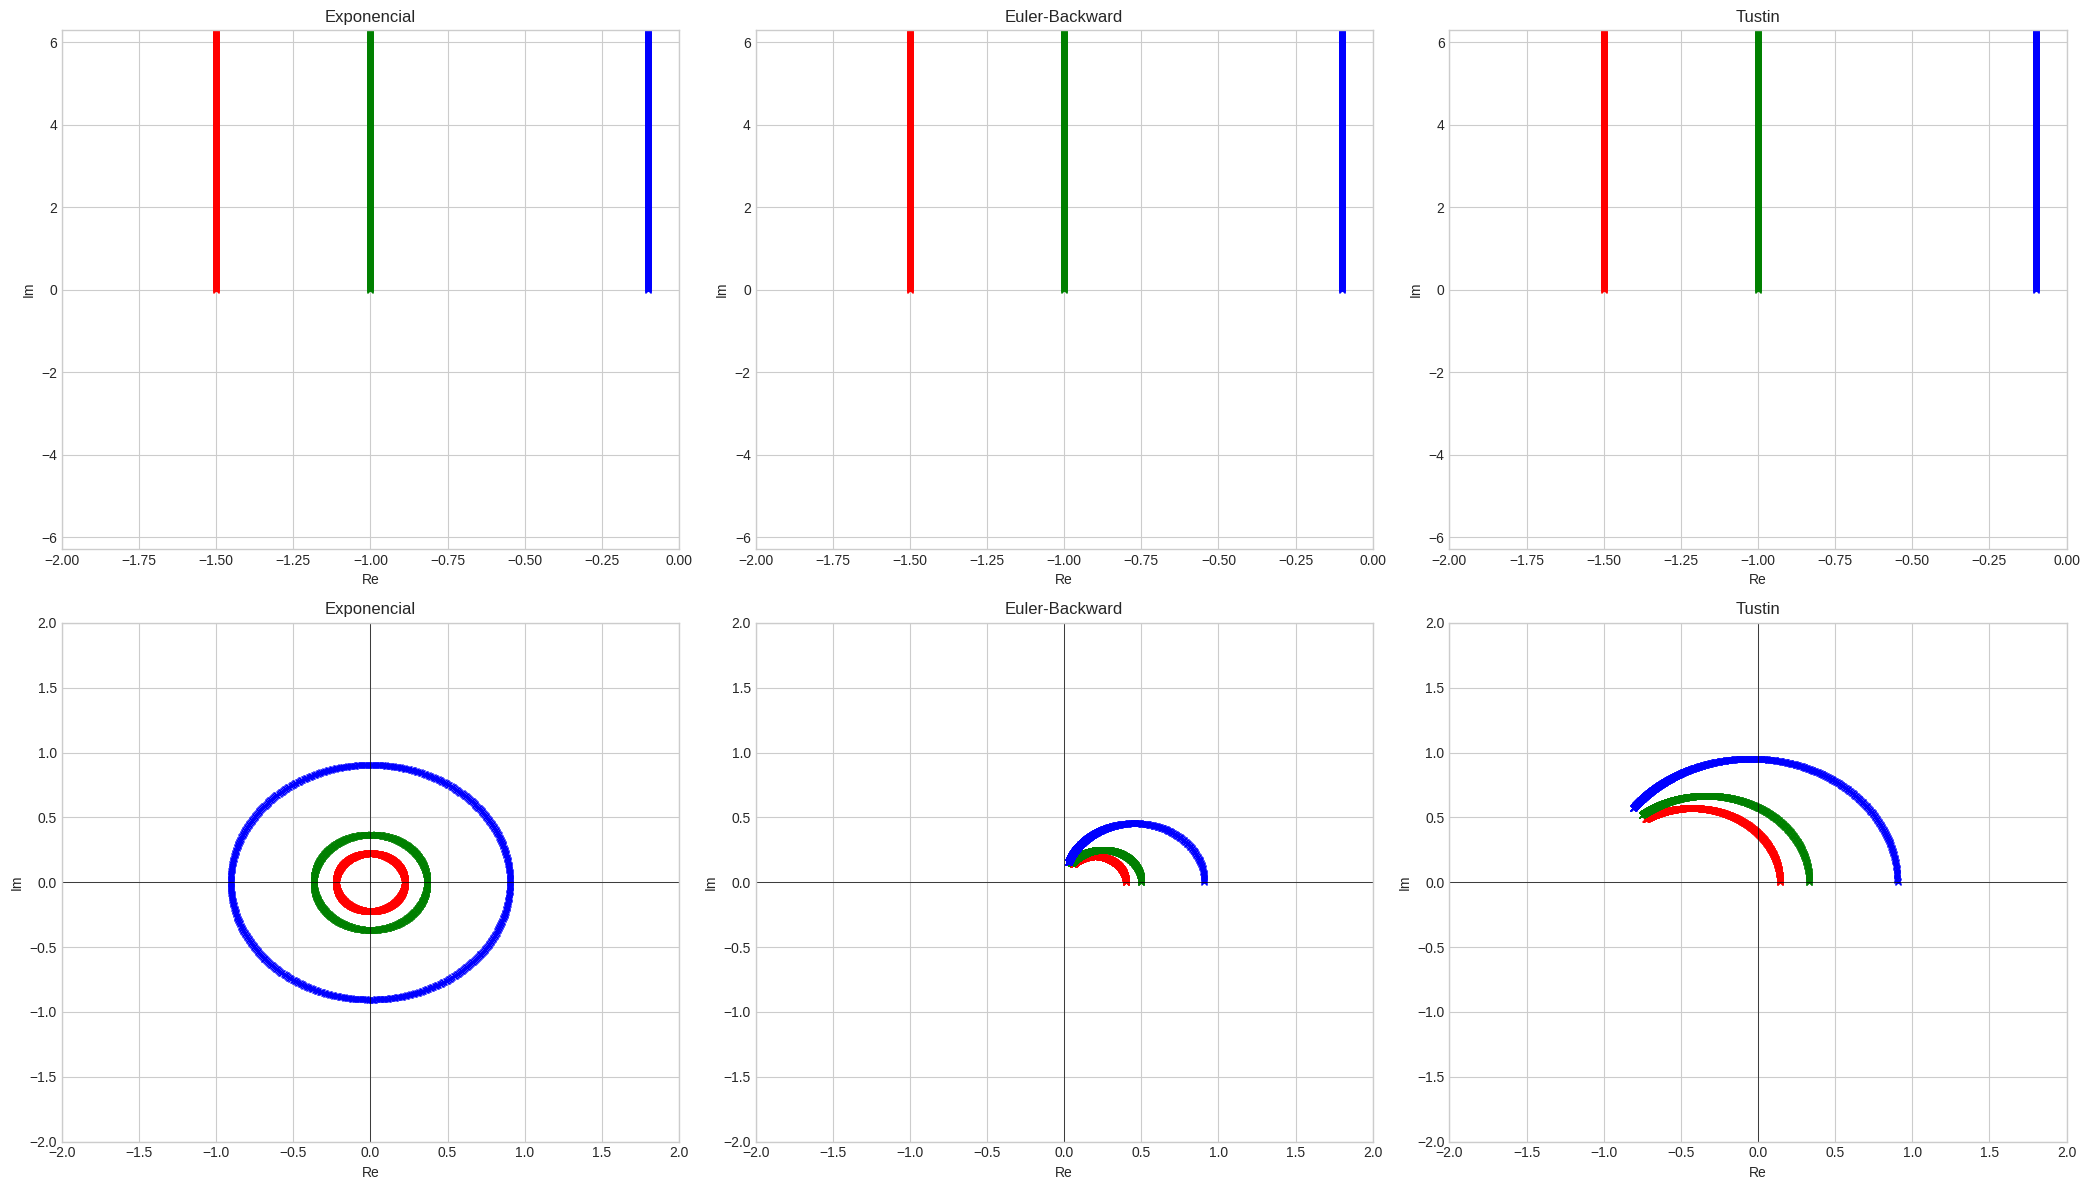

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(21, 12))

# Mapping methods
methods = ['Exponencial', 'Euler-Backward', 'Tustin']
methods_colors = ['red', 'blue', 'orange']

for method_idx, method in enumerate(methods):
    for idx, sigma in enumerate(sigmas):
        # Frequency values
        wn = np.arange(0, 2*np.pi, 0.01)
        
        # Calculating s and z values
        s = sigma + 1j * wn
        
        # Mapeamento de acordo com o método
        if method == 'Exponencial':
            z = np.exp(s * T)
        elif method == 'Euler-Backward':
            z = 1 / (1 - s * T)
        elif method == 'Tustin':
            z = (2/T + s) / (2/T - s)
        else:
            raise ValueError("Método desconhecido.")
        
        axs[0, method_idx].plot(np.real(s), np.imag(s), marker='x', linestyle='None',
                                color=colors[idx], markersize=4, label=labels[idx] if idx ==0 else "")
        
        # Plot no plano-z
        axs[1, method_idx].plot(np.real(z), np.imag(z), marker='x', linestyle='None',
                                color=colors[idx], markersize=4)

    # Configurações dos subplots
    axs[0, method_idx].set_title(methods[method_idx])
    axs[0, method_idx].set_xlabel('Re')
    axs[0, method_idx].set_ylabel('Im')
    axs[0, method_idx].set_xlim([-2, 0])
    axs[0, method_idx].set_ylim([-2*np.pi, 2*np.pi])
    axs[0, method_idx].grid(True)

    axs[1, method_idx].set_title(methods[method_idx])
    axs[1, method_idx].set_xlabel('Re')
    axs[1, method_idx].set_ylabel('Im')
    axs[1, method_idx].set_xlim([-2, 2])
    axs[1, method_idx].set_ylim([-2, 2])
    axs[1, method_idx].axhline(0, color='black', linewidth=0.5)
    axs[1, method_idx].axvline(0, color='black', linewidth=0.5)
    axs[1, method_idx].grid(True)

plt.tight_layout()
plt.show()

### Questão 3 

Nessa atividade, o objetivo é verificar o mapeamento bilinear do círculo unitário para o semi-plano esquerdo do plano-w. Isso é interessante, pois, permite avaliar estabilidade de um sistema em tempo discreto da mesma forma que se faz em tempo contínuo.

Para isso, considere o mapeamento

$$
w = \frac{z + 1}{z - 1}
$$

Dessa forma, círculos de raio menor que 1 no plano-z cobrem o semi-plano esquerdo do plano-w. Verificando o mapeamento no Matlab, o que ocorre com os polos cuja frequência está próxima da frequência de Nyquist no plano-w?

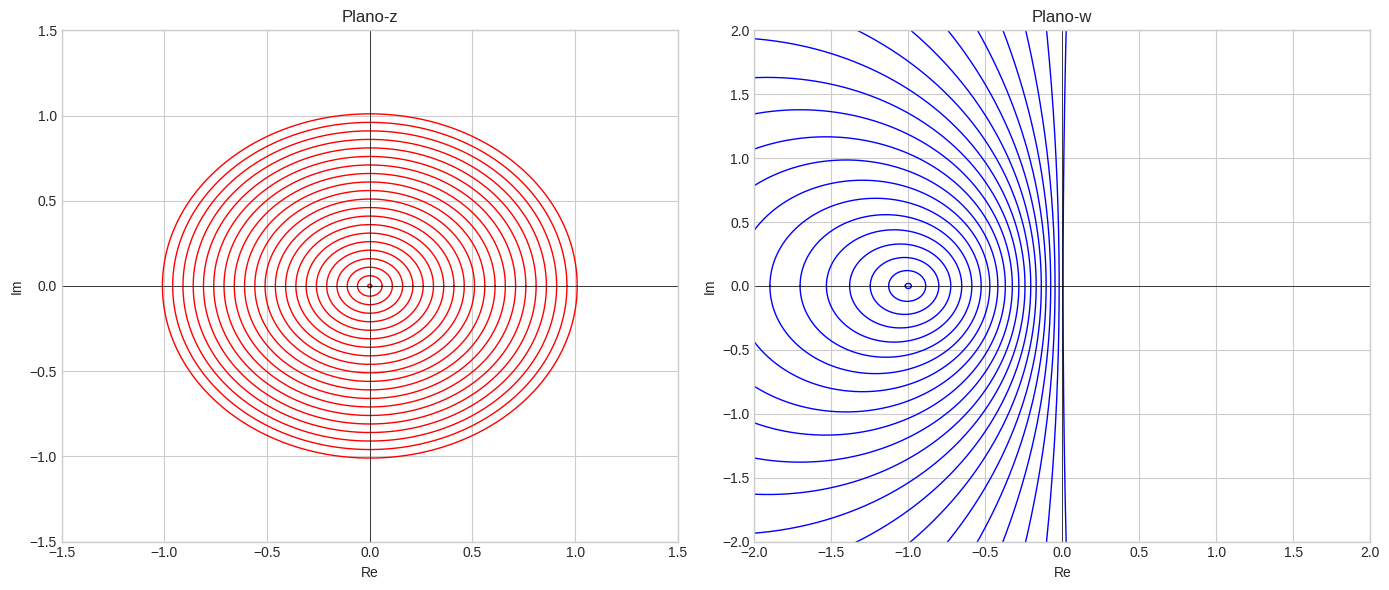

In [4]:
def bilinear_mapping(z):
    return (z + 1) / (z - 1)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Frequency values
theta = np.linspace(0, 2*np.pi, 1000)

for r in np.arange(0.01, 1.05, 0.05):
    # Calculating s and z values
    z = r * np.exp(1j * theta)
    w = bilinear_mapping(z)
    
    axs[0].plot(np.real(z), np.imag(z), 'red', linewidth=1)
    axs[1].plot(np.real(w), np.imag(w), 'blue', linewidth=1)

axs[0].set_title('Plano-z')
axs[0].set_xlabel('Re')
axs[0].set_ylabel('Im')
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([-1.5, 1.5])
axs[0].grid(True)
axs[0].axhline(0, color='black', linewidth=0.5)
axs[0].axvline(0, color='black', linewidth=0.5)

axs[1].set_title('Plano-w')
axs[1].set_xlabel('Re')
axs[1].set_ylabel('Im')
axs[1].set_xlim([-2, 2])
axs[1].set_ylim([-2, 2])
axs[1].grid(True)
axs[1].axhline(0, color='black', linewidth=0.5)
axs[1].axvline(0, color='black', linewidth=0.5)

plt.tight_layout()
plt.show()

### Questão 6

De forma simplificada, uma aeronave com piloto automático no módulo longitudinal obedece a seguinte função de transferência: 

$$
G(s) = \frac{(s + 1)}{s(s − 1)(s2 + 4s + 16)}
$$

1. Obtenha o lugar geométrico das raízes desse sistema em tempo contínuo.

2. Obtenha a faixa de ganho para os quais o sistema é estável.
 
3. Faça a discretização da FT com $T = 0.5$ usando método degrau-invariante e obtenha o lugar geométrico das raízes do sistema discretizado.

4. Repita o item anterior usando metodo de discretização de Tustin.

5. Apresente um comparativo da resposta ao degrau desse sistema em tempo contínuo com as versões discretizadas usando método degrau-invariante e Tustin para um ganho estável. O que pode-se concluir em relação ao transitório do sistema discretizado?

/home/gian/.local/lib/python3.8/site-packages/control/rlocus.py:132: FutureWarning: 'Plot' keyword is deprecated in root_locus; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in root_locus; "


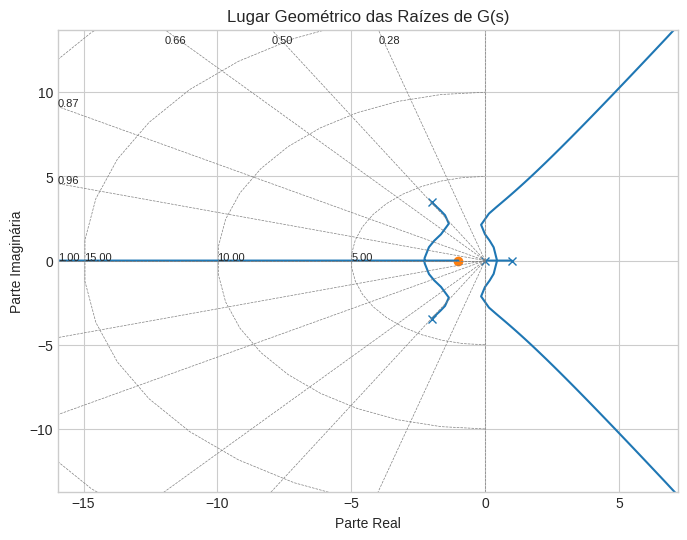

In [5]:
# Defining the transfer function
num = [1, 1]
den = [1, 3, 12, -16, 0]

G = control.TransferFunction(num, den)

plt.figure(figsize=(8,6))
control.root_locus(G, Plot=True)
plt.title('Lugar Geométrico das Raízes de G(s)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.grid(True)
plt.show()

In [6]:
# Values for K
K_values = np.linspace(0, 100, 1000)

rlist, klist = control.root_locus(G, kvect=K_values, Plot=False)

def is_stable(poles):
    return np.all(np.real(poles) < 0)

# Identify stable K values
stable_K = []
for idx, poles in enumerate(rlist):
    if is_stable(poles):
        stable_K.append(klist[idx])

if stable_K:
    K_min = min(stable_K)
    K_max = max(stable_K)
    print(f'Faixa de ganho K para estabilidade: {K_min:.2f} <= K <= {K_max:.2f}')
else:
    print('Nenhum ganho K mantém o sistema estável.')

Faixa de ganho K para estabilidade: 23.32 <= K <= 35.64



Função de Transferência Discretizada (Degrau-Invariante):

0.01509 z^3 + 0.03196 z^2 - 0.0165 z - 0.005148
-----------------------------------------------
z^4 - 2.531 z^3 + 1.471 z^2 - 0.1637 z + 0.2231

dt = 0.5



/home/gian/.local/lib/python3.8/site-packages/control/rlocus.py:132: FutureWarning: 'Plot' keyword is deprecated in root_locus; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in root_locus; "


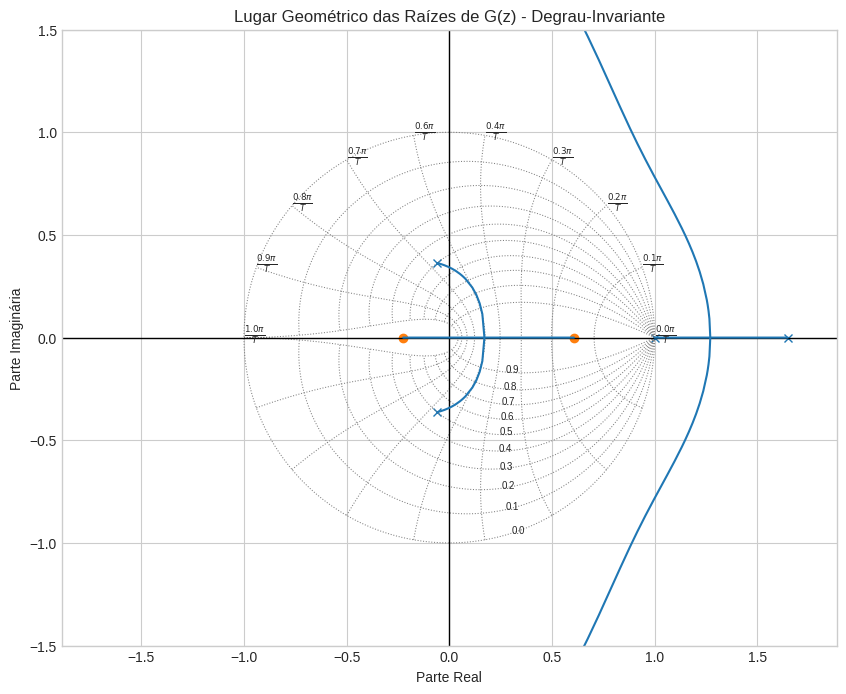

In [11]:
T = 0.5

try:
    Gd_step = control.c2d(G, T, method='zoh')
    print('\nFunção de Transferência Discretizada (Degrau-Invariante):')
    print(Gd_step)

    plt.figure(figsize=(10, 8))
    control.root_locus(Gd_step, Plot=True, grid=True)
    plt.title('Lugar Geométrico das Raízes de G(z) - Degrau-Invariante')
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.show()
except Exception as e:
    print('\nErro ao discretizar usando o método Degrau-Invariante:', e)
    print('Provavelmente devido a polos instáveis no sistema contínuo.')


Função de Transferência Discretizada (Tustin):

0.008681 z^4 + 0.02083 z^3 + 0.01042 z^2 - 0.006944 z - 0.005208
----------------------------------------------------------------
          z^4 - 2.667 z^3 + 2 z^2 - 0.8889 z + 0.5556

dt = 0.5



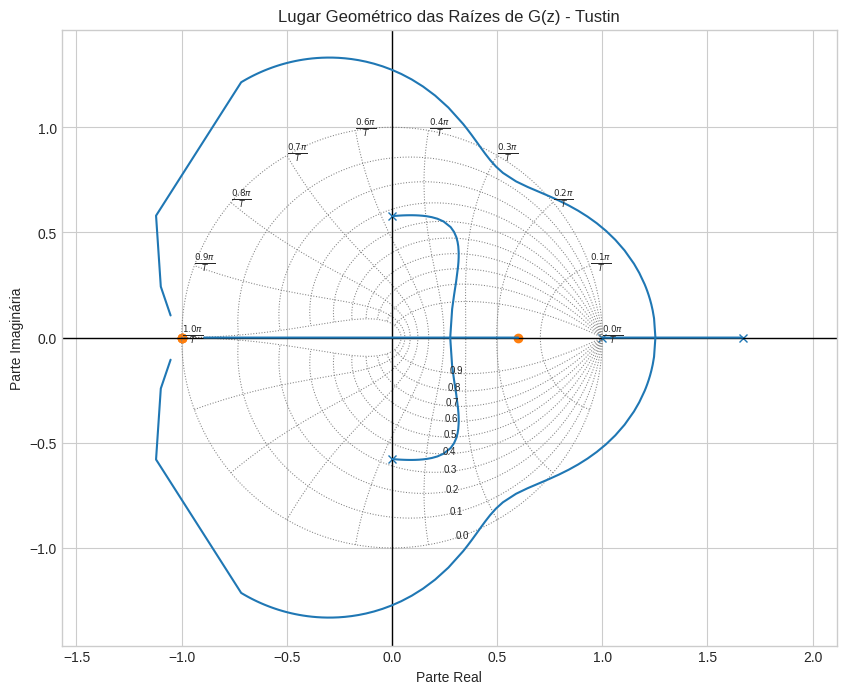

In [8]:
Gd_tustin = control.c2d(G, T, method='tustin')

try:
    print('\nFunção de Transferência Discretizada (Tustin):')
    print(Gd_tustin)

    plt.figure(figsize=(10, 8))
    control.root_locus(Gd_tustin, Plot=True, grid=True)
    plt.title('Lugar Geométrico das Raízes de G(z) - Tustin')
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.show()
except Exception as e:
    print('\nErro ao discretizar usando o método Tustin:', e)
    print('Provavelmente devido a polos instáveis no sistema contínuo.')


Usando K = 29.48 dentro da faixa estável (23.32 <= K <= 35.64).


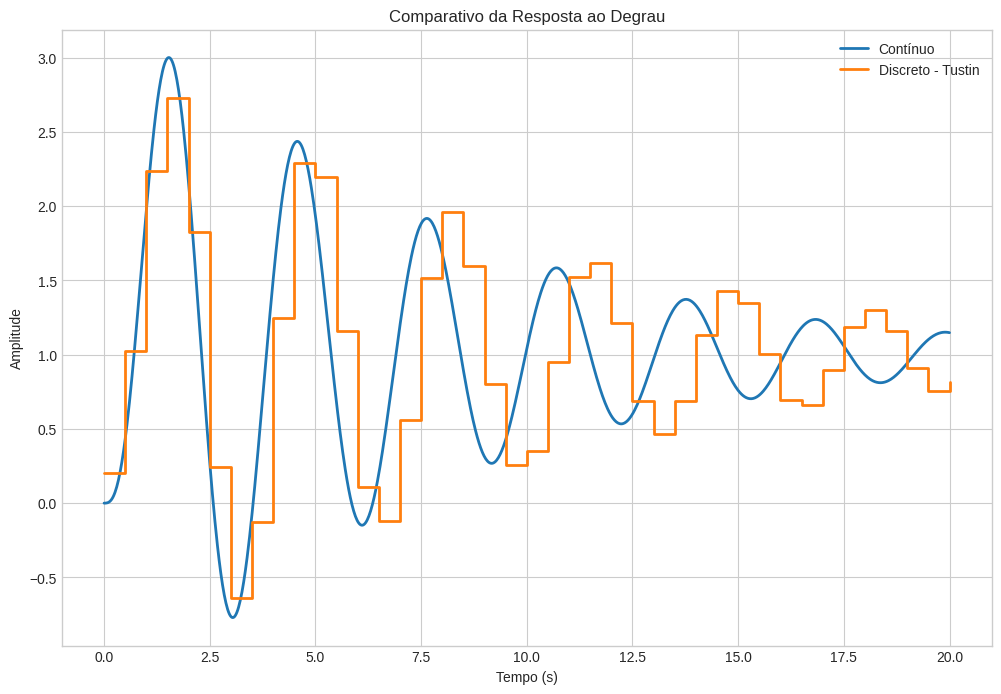

In [9]:
# Get a K value within the stable range
if 'K_min' in locals() and 'K_max' in locals() and len(stable_K) > 0:
    K = (K_min + K_max) / 2
    print(f'\nUsando K = {K:.2f} dentro da faixa estável ({K_min:.2f} <= K <= {K_max:.2f}).')
else:
    print('\nNenhuma faixa de ganho K estável encontrada. Selecionando K = 0.1 como exemplo.')
    K = 0.1 

# Transfer function with feedback
Gmf_continuo = control.feedback(K*G, 1)
Gmf_tustin = control.feedback(K*Gd_tustin, 1)

# Time for the step response
t_continuo = np.linspace(0, 20, 1000)  
t_discreto = np.arange(0, 20 + T, T)   

# Step response for the continuous system
T_continuo, y_continuo = control.step_response(Gmf_continuo, t_continuo)

# Step response for the discrete system
T_discrete_tustin, y_tustin = control.step_response(Gmf_tustin, t_discreto)

plt.figure(figsize=(12, 8))
plt.plot(T_continuo, y_continuo, label='Contínuo', linewidth=2)
plt.step(T_discrete_tustin, y_tustin, where='post', label='Discreto - Tustin', linewidth=2)
plt.title('Comparativo da Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()